### Exercice 1 

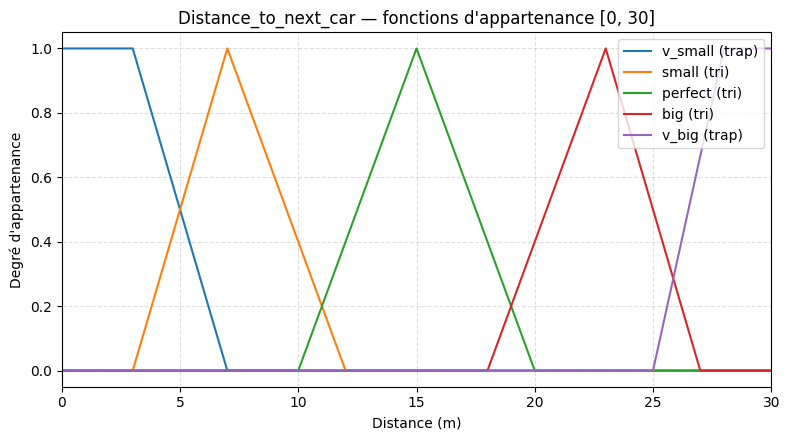

In [3]:

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 1) Univers de discours
x = np.arange(0, 30.01, 0.05)  # [0, 30] pas fin

v_small = fuzz.trapmf(x, [0, 0, 3, 7])       
small   = fuzz.trimf(x, [3, 7, 12])          
perfect = fuzz.trimf(x, [10, 15, 20])        
big     = fuzz.trimf(x, [18, 23, 27])        
v_big   = fuzz.trapmf(x, [25, 28, 30, 30])   

# 3) Visualisation (facultative)
plt.figure(figsize=(8,4.5))
plt.plot(x, v_small, label='v_small (trap)')
plt.plot(x, small,   label='small (tri)')
plt.plot(x, perfect, label='perfect (tri)')
plt.plot(x, big,     label='big (tri)')
plt.plot(x, v_big,   label='v_big (trap)')
plt.title("Distance_to_next_car — fonctions d'appartenance [0, 30]")
plt.xlabel("Distance (m)")
plt.ylabel("Degré d'appartenance")
plt.ylim(-0.05, 1.05)
plt.xlim(0, 30)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()




### Exercice 2 : 

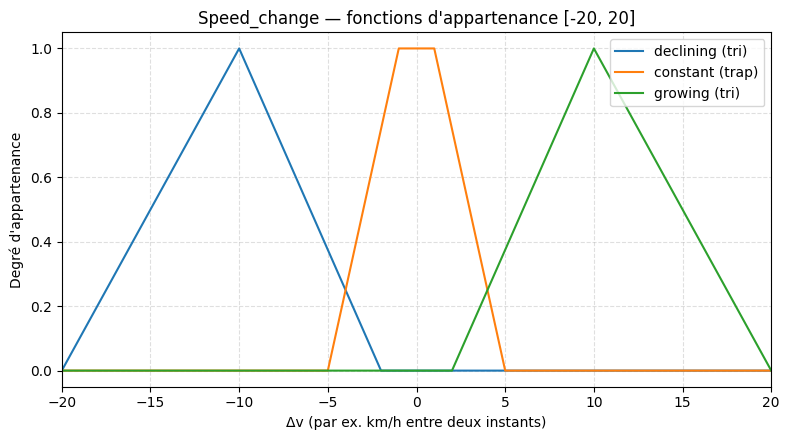

In [4]:

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 1) Univers de discours
x = np.arange(-20, 20.01, 0.05)

# 2) Ensembles flous 
declining = fuzz.trimf(x, [-20, -10, -2])   
constant  = fuzz.trapmf(x, [-5, -1, 1, 5]) 
growing   = fuzz.trimf(x, [2, 10, 20])     

# 3) Tracé des fonctions d'appartenance
plt.figure(figsize=(8, 4.5))
plt.plot(x, declining, label='declining (tri)')
plt.plot(x, constant,  label='constant (trap)')
plt.plot(x, growing,   label='growing (tri)')
plt.title("Speed_change — fonctions d'appartenance [-20, 20]")
plt.xlabel("Δv (par ex. km/h entre deux instants)")
plt.ylabel("Degré d'appartenance")
plt.ylim(-0.05, 1.05)
plt.xlim(-20, 20)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()



### Exercice 3

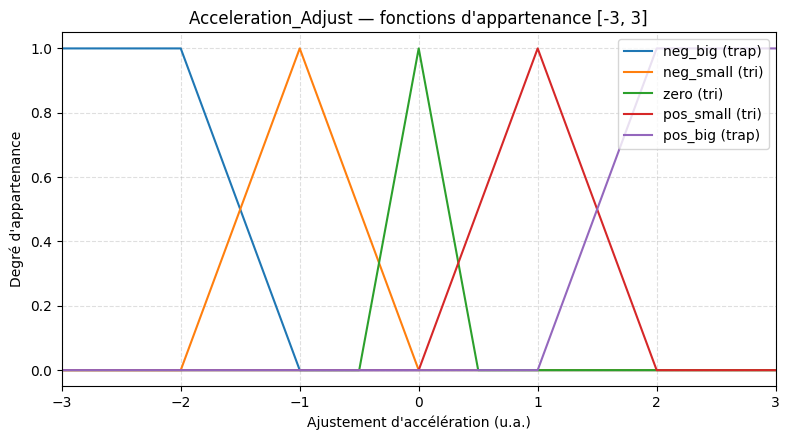

In [5]:

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 1) Univers de discours
x = np.arange(-3.0, 3.0 + 0.01, 0.01)

# 2) Ensembles flous 
neg_big    = fuzz.trapmf(x, [-3.0, -3.0, -2.0, -1.0])
neg_small  = fuzz.trimf(x, [-2.0, -1.0,  0.0])
zero       = fuzz.trimf(x, [-0.5,  0.0,  0.5])
pos_small  = fuzz.trimf(x, [ 0.0,  1.0,  2.0])
pos_big    = fuzz.trapmf(x, [ 1.0,  2.0,  3.0,  3.0])

# 3) Tracé des fonctions d'appartenance
plt.figure(figsize=(8, 4.5))
plt.plot(x, neg_big,   label='neg_big (trap)')
plt.plot(x, neg_small, label='neg_small (tri)')
plt.plot(x, zero,      label='zero (tri)')
plt.plot(x, pos_small, label='pos_small (tri)')
plt.plot(x, pos_big,   label='pos_big (trap)')
plt.title("Acceleration_Adjust — fonctions d'appartenance [-3, 3]")
plt.xlabel("Ajustement d'accélération (u.a.)")
plt.ylabel("Degré d'appartenance")
plt.ylim(-0.05, 1.05)
plt.xlim(-3, 3)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


#### Exercice 4

Entrées : Distance=13 | Speed_change=-2.5
Sortie défuzzifiée Acceleration_Adjust = 0.2219


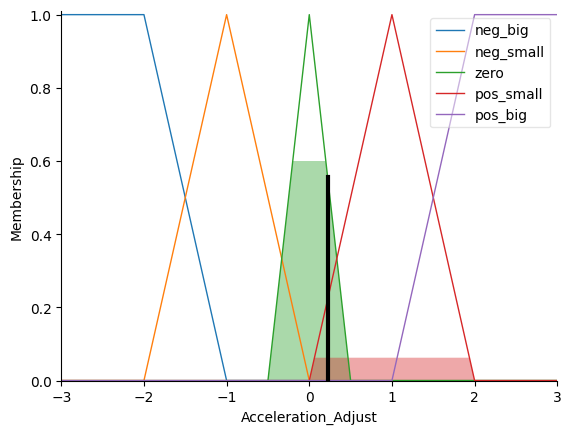

In [9]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

# Distance_to_next_car in [0, 30]
distance = ctrl.Antecedent(np.arange(0, 30.01, 0.05), 'Distance_to_next_car')
distance['v_small'] = fuzz.trapmf(distance.universe, [0, 0, 3, 7])     
distance['small']   = fuzz.trimf(distance.universe, [3, 7, 12])        
distance['perfect'] = fuzz.trimf(distance.universe, [10, 15, 20])      
distance['big']     = fuzz.trimf(distance.universe, [18, 23, 27])      
distance['v_big']   = fuzz.trapmf(distance.universe, [25, 28, 30, 30]) 

# Speed_change in [-20, 20]
speed = ctrl.Antecedent(np.arange(-20, 20.01, 0.05), 'Speed_change')
speed['declining'] = fuzz.trimf(speed.universe, [-20, -10, -2]) 
speed['constant']  = fuzz.trapmf(speed.universe, [-5, -1, 1, 5])
speed['growing']   = fuzz.trimf(speed.universe, [2, 10, 20])    

# Acceleration_Adjust in [-3, 3]
acc = ctrl.Consequent(np.arange(-3, 3.01, 0.01), 'Acceleration_Adjust')
acc['neg_big']   = fuzz.trapmf(acc.universe, [-3, -3, -2, -1])      
acc['neg_small'] = fuzz.trimf(acc.universe, [-2, -1, 0])            
acc['zero']      = fuzz.trimf(acc.universe, [-0.5, 0, 0.5])         
acc['pos_small'] = fuzz.trimf(acc.universe, [0, 1, 2])              
acc['pos_big']   = fuzz.trapmf(acc.universe, [1, 2, 3, 3])          


# 2) Règles de l’énoncé

rules = [
    # v_small
    ctrl.Rule(distance['v_small'] & speed['declining'], acc['neg_small']),
    ctrl.Rule(distance['v_small'] & speed['constant'],  acc['neg_big']),
    ctrl.Rule(distance['v_small'] & speed['growing'],   acc['neg_big']),
    # small
    ctrl.Rule(distance['small'] & speed['declining'], acc['zero']),
    ctrl.Rule(distance['small'] & speed['constant'],  acc['neg_small']),
    ctrl.Rule(distance['small'] & speed['growing'],   acc['neg_big']),
    # perfect
    ctrl.Rule(distance['perfect'] & speed['declining'], acc['pos_small']),
    ctrl.Rule(distance['perfect'] & speed['constant'],  acc['zero']),
    ctrl.Rule(distance['perfect'] & speed['growing'],   acc['neg_small']),
    # big
    ctrl.Rule(distance['big'] & speed['declining'], acc['pos_big']),
    ctrl.Rule(distance['big'] & speed['constant'],  acc['pos_small']),
    ctrl.Rule(distance['big'] & speed['growing'],   acc['zero']),
    # v_big
    ctrl.Rule(distance['v_big'] & speed['declining'], acc['pos_big']),
    ctrl.Rule(distance['v_big'] & speed['constant'],   acc['pos_big']),
    ctrl.Rule(distance['v_big'] & speed['growing'],   acc['pos_small']),
]


# 3) Système et simulation

system = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(system)

# Entrées demandées
sim.input['Distance_to_next_car'] = 13.0
sim.input['Speed_change'] = -2.5

# Calcul
sim.compute()

print("Entrées : Distance=13 | Speed_change=-2.5")
print("Sortie défuzzifiée Acceleration_Adjust =", round(sim.output['Acceleration_Adjust'], 4))

# 4) Visualisation de la défuzzification

acc.view(sim=sim)
plt.show()
